# Exploration of traffic data at Hanasaari on road 51

This document explores historical traffic data from an automatic traffic meassurement point on Hanasaari.

"*The TMS point consists of ta data collecting unit and two induction loops on each traffic lane. The device registers vehicles passing the TMS point, recording data such as time, direction, lane, speed, vehicle length, time elapsed between vehicles and the vehicle class.*" From the documentation: http://www.liikennevirasto.fi/web/en/open-data/materials/tms-data#.WeilKBOCwp8

The point is located at: https://www.google.fi/maps/place/60%C2%B009'53.9%22N+24%C2%B050'55.5%22E/@60.1649798,24.846555,17z/data=!3m1!4b1!4m5!3m4!1s0x0:0x0!8m2!3d60.1649771!4d24.8487437?hl=en

Metadata for LAM point (101): https://tie.digitraffic.fi/api/v1/metadata/tms-stations/tms-number/101


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib
%matplotlib inline

The first examination will be of all data from 2016.

https://ava.liikennevirasto.fi/lam/rawdata/[year]/[ELY]/lamraw_[lam_id]_[yearshort]_[day_number].csv

NOTE! In the near future the address will change to aineistot.liikennevirasto.fi/

Description of the result file format
The result file is a CSV file separated by semicolons (;). The time is the current time in Finland, EET or EEST in the summertime. The CSV files include the following fields (unit in parentheses):

TMS point id
year
päivän järjestysnumero
hour
minute
second
1/100 second
length (m)
lane
direction
vehicle class
speed(km/h)
faulty (0 = validi record, 1=faulty record)
total time (technical)
time interval (technical)
queue start (technical)

First a test with one day:

In [2]:
columns = [
'TMS id',
'year',
'päivän järjestysnumero',
'hour',
'minute',
'second',
'1/100 second',
'length (m)',
'lane',
'direction',
'vehicle class',
'speed(km/h)',
'faulty (0 = validi record, 1=faulty record)',
'total time (technical)',
'time interval (technical)',
'queue start (technical)']

firstday = pd.read_csv("https://ava.liikennevirasto.fi/lam/rawdata/2016/01/lamraw_101_16_1.csv",sep=';',names=columns)
firstday

TMS id  year  päivän järjestysnumero  hour  minute  second  \
0         101    16                       1     0       0       9   
1         101    16                       1     0       0      17   
2         101    16                       1     0       0      19   
3         101    16                       1     0       0      21   
4         101    16                       1     0       0      29   
5         101    16                       1     0       0      40   
6         101    16                       1     0       0      43   
7         101    16                       1     0       0      53   
8         101    16                       1     0       0      54   
9         101    16                       1     0       0      58   
10        101    16                       1     0       1       0   
11        101    16                       1     0       1       9   
12        101    16                       1     0       1      13   
13        101    16                       1     0       1      22   
14        101    16                       1     0       1      23   
15        101    16                       1     0       1      28   
16        101    16                       1     0       1      35   
17        101    16                       1     0       1      38   
18        101    16                       1     0       1      43   
19        101    16                       1     0       1      45   
20        101    16                       1     0       1      46   
21        101    16                       1     0       1      50   
22        101    16                       1     0       1      53   
23        101    16                       1     0       2       6   
24        101    16                       1     0       2      23   
25        101    16                       1     0       2      40   
26        101    16                       1     0       2      44   
27        101    16                       1     0       2      58   
28        101    16                       1     0       3       3   
29        101    16                       1     0       3       9   
...       ...   ...                     ...   ...     ...     ...   
26493     101    16                       1    23      56      38   
26494     101    16                       1    23      56      39   
26495     101    16                       1    23      56      42   
26496     101    16                       1    23      56      46   
26497     101    16                       1    23      56      50   
26498     101    16                       1    23      56      55   
26499     101    16                       1    23      57       2   
26500     101    16                       1    23      57       9   
26501     101    16                       1    23      57      10   
26502     101    16                       1    23      57      31   
26503     101    16                       1    23      57      32   
26504     101    16                       1    23      57      40   
26505     101    16                       1    23      57      41   
26506     101    16                       1    23      57      47   
26507     101    16                       1    23      57      53   
26508     101    16                       1    23      57      53   
26509     101    16                       1    23      57      56   
26510     101    16                       1    23      57      59   
26511     101    16                       1    23      58       0   
26512     101    16                       1    23      58       3   
26513     101    16                       1    23      58       5   
26514     101    16                       1    23      58       8   
26515     101    16                       1    23      58       9   
26516     101    16                       1    23      58      16   
26517     101    16                       1    23      58      38   
26518     101    16                       1    23      58      40   
26519

In [3]:
firstday['faulty (0 = validi record, 1=faulty record)'].value_counts()

0    26331
1      192
Name: faulty (0 = validi record, 1=faulty record), dtype: int64

### Drop all rows with faulty records and inspect that there are no non-null values.

In [4]:
valid = firstday['faulty (0 = validi record, 1=faulty record)'] == 0
firstday = firstday[valid]

firstday.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26331 entries, 0 to 26522
Data columns (total 16 columns):
TMS id                                         26331 non-null int64
year                                           26331 non-null int64
päivän järjestysnumero                         26331 non-null int64
hour                                           26331 non-null int64
minute                                         26331 non-null int64
second                                         26331 non-null int64
1/100 second                                   26331 non-null int64
length (m)                                     26331 non-null float64
lane                                           26331 non-null int64
direction                                      26331 non-null int64
vehicle class                                  26331 non-null int64
speed(km/h)                                    26331 non-null int64
faulty (0 = validi record, 1=faulty record)    26331 non-null int64
total

In [5]:
def get_year(year):
    
    days = []
    
    for day in range(1,367):
        try:
            df = pd.read_csv("https://ava.liikennevirasto.fi/lam/rawdata/2016/01/lamraw_101_{}_{}.csv".format(str(year)[-2:],str(day)),sep=';',names=columns)
            valid = df['faulty (0 = validi record, 1=faulty record)'] == 0
            days.append(df[valid])
            
        except urllib.error.HTTPError as e:
            print("Unable to retrive data for day {}".format(day))
    
    return days

In [6]:
days_16 = get_year(2016)
days_16

Unable to retrive data for day 54
Unable to retrive data for day 69
Unable to retrive data for day 70
Unable to retrive data for day 366


[       TMS id  year  päivän järjestysnumero  hour  minute  second  \
 0         101    16                       1     0       0       9   
 1         101    16                       1     0       0      17   
 2         101    16                       1     0       0      19   
 3         101    16                       1     0       0      21   
 4         101    16                       1     0       0      29   
 5         101    16                       1     0       0      40   
 6         101    16                       1     0       0      43   
 7         101    16                       1     0       0      53   
 8         101    16                       1     0       0      54   
 9         101    16                       1     0       0      58   
 10        101    16                       1     0       1       0   
 11        101    16                       1     0       1       9   
 12        101    16                       1     0       1      13   
 13        101    16

Apparently there are 3 days missing from the dataset, days: 54, 69 and 70.

Aggregate all days to one dataframe. 

In [7]:
y16 = pd.concat(days_16)
y16

TMS id year päivän järjestysnumero hour minute second 1/100 second  \
0        101   16                      1    0      0      9           11   
1        101   16                      1    0      0     17            2   
2        101   16                      1    0      0     19           99   
3        101   16                      1    0      0     21           99   
4        101   16                      1    0      0     29           99   
5        101   16                      1    0      0     40            3   
6        101   16                      1    0      0     43           14   
7        101   16                      1    0      0     53            4   
8        101   16                      1    0      0     54           16   
9        101   16                      1    0      0     58           99   
10       101   16                      1    0      1      0           99   
11       101   16                      1    0      1      9           78   
12       101   16                      1    0      1     13           99   
13       101   16                      1    0      1     22           87   
14       101   16                      1    0      1     23            8   
15       101   16                      1    0      1     28           99   
16       101   16                      1    0      1     35           99   
17       101   16                      1    0      1     38           19   
18       101   16                      1    0      1     43           99   
19       101   16                      1    0      1     45           99   
20       101   16                      1    0      1     46           99   
21       101   16                      1    0      1     50           99   
22       101   16                      1    0      1     53           80   
23       101   16                      1    0      2      6           99   
24       101   16                      1    0      2     23           69   
25       101   16                      1    0      2     40           99   
26       101   16                      1    0      2     44           75   
27       101   16                      1    0      2     58           99   
28       101   16                      1    0      3      3           99   
29       101   16                      1    0      3      9           14   
...      ...  ...                    ...  ...    ...    ...          ...   
57899    101   16                    365   23     58     20           21   
57900    101   16                    365   23     58     25            0   
57901    101   16                    365   23     58     30           99   
57902    101   16                    365   23     58     31           75   
57903    101   16                    365   23     58     36           48   
57904    101   16                    365   23     58     36           68   
57905    101   16                    365   23     58     39           99   
57906    101   16                    365   23     58     44           45   
57907    101   16                    365   23     58     48           25   
57908    101   16                    365   23     58     50            7   
57909    101   16                    365   23     58     53           15   
57910    101   16                    365   23     58     54           43   
57911    101   16                    365   23     58     54           73   
57912    101   16                    365   23     59      6           99   
57913    101   16                    365   23     59      9            5   
57914    101   16                    365   23     59     11            5   
57915    101   16                    365   23     59     11           99   
57916    101   16                    365   23     59     15           99   
57917    101   16                    365   23     59     20            6   
57918    101   16                    365   23     59     29           99   
57919    101   16                    365   23     59  

In [8]:
y16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21565203 entries, 0 to 57928
Data columns (total 16 columns):
TMS id                                         object
year                                           object
päivän järjestysnumero                         object
hour                                           object
minute                                         object
second                                         object
1/100 second                                   object
length (m)                                     float64
lane                                           object
direction                                      object
vehicle class                                  object
speed(km/h)                                    object
faulty (0 = validi record, 1=faulty record)    object
total time (technical)                         object
time interval (technical)                      object
queue start (technical)                        object
dtypes: float64(1), obj

Now some of the unnecessary data can be droped.

In [9]:
#Free up some memory
del days_16

In [10]:
unnecessary = ['TMS id','faulty (0 = validi record, 1=faulty record)', 'total time (technical)','queue start (technical)']
y16 = y16.drop(unnecessary,axis=1)
y16.head()

year päivän järjestysnumero hour minute second 1/100 second  length (m)  \
0   16                      1    0      0      9           11         3.6   
1   16                      1    0      0     17            2         3.8   
2   16                      1    0      0     19           99         3.6   
3   16                      1    0      0     21           99         3.4   
4   16                      1    0      0     29           99         4.0   

  lane direction vehicle class speed(km/h) time interval (technical)  
0    2         1             1          80                        -2  
1    2         1             1          76                       774  
2    5         2             1          82                        -2  
3    5         2             1          85                       184  
4    2         1             1          95                      1279

Convert the suitable types to int

In [11]:
y16[['year', 'päivän järjestysnumero','hour','minute','second','1/100 second','lane','direction','time interval (technical)','speed(km/h)']] = y16[['year', 'päivän järjestysnumero','hour','minute','second','1/100 second','lane','direction','time interval (technical)','speed(km/h)']].astype(int)

In [13]:
y16.head()

year  päivän järjestysnumero  hour  minute  second  1/100 second  \
0    16                       1     0       0       9            11   
1    16                       1     0       0      17             2   
2    16                       1     0       0      19            99   
3    16                       1     0       0      21            99   
4    16                       1     0       0      29            99   

   length (m)  lane  direction vehicle class  speed(km/h)  \
0         3.6     2          1             1           80   
1         3.8     2          1             1           76   
2         3.6     5          2             1           82   
3         3.4     5          2             1           85   
4         4.0     2          1             1           95   

   time interval (technical)  
0                         -2  
1                        774  
2                         -2  
3                        184  
4                       1279

In [14]:
y16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21565203 entries, 0 to 57928
Data columns (total 12 columns):
year                         int64
päivän järjestysnumero       int64
hour                         int64
minute                       int64
second                       int64
1/100 second                 int64
length (m)                   float64
lane                         int64
direction                    int64
vehicle class                object
speed(km/h)                  int64
time interval (technical)    int64
dtypes: float64(1), int64(10), object(1)
memory usage: 2.1+ GB


In [31]:
#Save to file to be able to continue from here if a crash happens, optional
y16.to_csv('data/hanasaari_lam_2016.csv',index_label ='index')

In [2]:
df = pd.read_csv('data/hanasaari_lam_2016.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21565203 entries, 0 to 21565202
Data columns (total 13 columns):
index                        int64
year                         int64
päivän järjestysnumero       int64
hour                         int64
minute                       int64
second                       int64
1/100 second                 int64
length (m)                   float64
lane                         int64
direction                    int64
vehicle class                int64
speed(km/h)                  int64
time interval (technical)    int64
dtypes: float64(1), int64(12)
memory usage: 2.1 GB


In [5]:
y16 = df

Function (slow) for getting the time from the start of the year as a timedelta to be able to generate date-time stamp.

In [6]:
def getdelta(df):
    
    delta = []
    for index, year, daynum, hour, minute, second, csec in df.itertuples():
        delta.append(pd.Timedelta(days=(daynum-1),hours=hour, minutes=minute, seconds=second, microseconds=(csec*10000)))
    
    return pd.Series(data=delta,name="timedelta")

In [7]:
timedelta = getdelta(y16[['year', 'päivän järjestysnumero','hour','minute','second','1/100 second']])

In [8]:
timedelta.head()

0   00:00:09.110000
1   00:00:17.020000
2   00:00:19.990000
3   00:00:21.990000
4   00:00:29.990000
Name: timedelta, dtype: timedelta64[ns]

In [9]:
y16['timedelta'] = timedelta
y16.head()

index  year  päivän järjestysnumero  hour  minute  second  1/100 second  \
0      0    16                       1     0       0       9            11   
1      1    16                       1     0       0      17             2   
2      2    16                       1     0       0      19            99   
3      3    16                       1     0       0      21            99   
4      4    16                       1     0       0      29            99   

   length (m)  lane  direction  vehicle class  speed(km/h)  \
0         3.6     2          1              1           80   
1         3.8     2          1              1           76   
2         3.6     5          2              1           82   
3         3.4     5          2              1           85   
4         4.0     2          1              1           95   

   time interval (technical)       timedelta  
0                         -2 00:00:09.110000  
1                        774 00:00:17.020000  
2                         -2 00:00:19.990000  
3                        184 00:00:21.990000  
4                       1279 00:00:29.990000

In [10]:
y16['date-time'] = pd.datetime(2016,1,1)
y16.head()

index  year  päivän järjestysnumero  hour  minute  second  1/100 second  \
0      0    16                       1     0       0       9            11   
1      1    16                       1     0       0      17             2   
2      2    16                       1     0       0      19            99   
3      3    16                       1     0       0      21            99   
4      4    16                       1     0       0      29            99   

   length (m)  lane  direction  vehicle class  speed(km/h)  \
0         3.6     2          1              1           80   
1         3.8     2          1              1           76   
2         3.6     5          2              1           82   
3         3.4     5          2              1           85   
4         4.0     2          1              1           95   

   time interval (technical)       timedelta  date-time  
0                         -2 00:00:09.110000 2016-01-01  
1                        774 00:00:17.020000 2016-01-01  
2                         -2 00:00:19.990000 2016-01-01  
3                        184 00:00:21.990000 2016-01-01  
4                       1279 00:00:29.990000 2016-01-01

In [11]:
datetime = y16['date-time'] + y16['timedelta']
datetime.head()

0   2016-01-01 00:00:09.110
1   2016-01-01 00:00:17.020
2   2016-01-01 00:00:19.990
3   2016-01-01 00:00:21.990
4   2016-01-01 00:00:29.990
dtype: datetime64[ns]

In [12]:
y16['date-time'] = datetime
y16.head()

index  year  päivän järjestysnumero  hour  minute  second  1/100 second  \
0      0    16                       1     0       0       9            11   
1      1    16                       1     0       0      17             2   
2      2    16                       1     0       0      19            99   
3      3    16                       1     0       0      21            99   
4      4    16                       1     0       0      29            99   

   length (m)  lane  direction  vehicle class  speed(km/h)  \
0         3.6     2          1              1           80   
1         3.8     2          1              1           76   
2         3.6     5          2              1           82   
3         3.4     5          2              1           85   
4         4.0     2          1              1           95   

   time interval (technical)       timedelta               date-time  
0                         -2 00:00:09.110000 2016-01-01 00:00:09.110  
1                        774 00:00:17.020000 2016-01-01 00:00:17.020  
2                         -2 00:00:19.990000 2016-01-01 00:00:19.990  
3                        184 00:00:21.990000 2016-01-01 00:00:21.990  
4                       1279 00:00:29.990000 2016-01-01 00:00:29.990

In [14]:
y16 = y16.drop(['index','timedelta'],axis=1)
y16.head()

year  päivän järjestysnumero  hour  minute  second  1/100 second  \
0    16                       1     0       0       9            11   
1    16                       1     0       0      17             2   
2    16                       1     0       0      19            99   
3    16                       1     0       0      21            99   
4    16                       1     0       0      29            99   

   length (m)  lane  direction  vehicle class  speed(km/h)  \
0         3.6     2          1              1           80   
1         3.8     2          1              1           76   
2         3.6     5          2              1           82   
3         3.4     5          2              1           85   
4         4.0     2          1              1           95   

   time interval (technical)               date-time  
0                         -2 2016-01-01 00:00:09.110  
1                        774 2016-01-01 00:00:17.020  
2                         -2 2016-01-01 00:00:19.990  
3                        184 2016-01-01 00:00:21.990  
4                       1279 2016-01-01 00:00:29.990

After the creation of a new date-time based index the source data for the index can be removed.

In [15]:
y16.tail()

year  päivän järjestysnumero  hour  minute  second  1/100 second  \
21565198    16                     365    23      59      46            99   
21565199    16                     365    23      59      49            99   
21565200    16                     365    23      59      52            99   
21565201    16                     365    23      59      53            71   
21565202    16                     365    23      59      56            72   

          length (m)  lane  direction  vehicle class  speed(km/h)  \
21565198         3.2     3          1              1           92   
21565199         4.0     2          1              1           92   
21565200         4.4     2          1              1           89   
21565201         3.2     2          1              1           86   
21565202         3.6     5          2              1           78   

          time interval (technical)               date-time  
21565198                       5241 2016-12-30 23:59:46.990  
21565199                       1098 2016-12-30 23:59:49.990  
21565200                        284 2016-12-30 23:59:52.990  
21565201                         54 2016-12-30 23:59:53.710  
21565202                       1358 2016-12-30 23:59:56.720

In [16]:
y16 = y16.set_index('date-time')

In [17]:
unnecessary = ['year','päivän järjestysnumero', 'hour','minute','second','1/100 second']
y16 = y16.drop(unnecessary,axis=1)

In [18]:
y16.head()

length (m)  lane  direction  vehicle class  \
date-time                                                             
2016-01-01 00:00:09.110         3.6     2          1              1   
2016-01-01 00:00:17.020         3.8     2          1              1   
2016-01-01 00:00:19.990         3.6     5          2              1   
2016-01-01 00:00:21.990         3.4     5          2              1   
2016-01-01 00:00:29.990         4.0     2          1              1   

                         speed(km/h)  time interval (technical)  
date-time                                                        
2016-01-01 00:00:09.110           80                         -2  
2016-01-01 00:00:17.020           76                        774  
2016-01-01 00:00:19.990           82                         -2  
2016-01-01 00:00:21.990           85                        184  
2016-01-01 00:00:29.990           95                       1279

### The data set is now cleaned for the purposes of this exploration


#### Write out the dataset to a csv

In [19]:
y16.to_csv('data/hanasaari_lam_2016.csv')

In [44]:
df = pd.read_csv('data/hanasaari_lam_2016.csv')
df.head()

date-time  length (m)  lane  direction  vehicle class  \
0  2016-01-01 00:00:09.110         3.6     2          1              1   
1  2016-01-01 00:00:17.020         3.8     2          1              1   
2  2016-01-01 00:00:19.990         3.6     5          2              1   
3  2016-01-01 00:00:21.990         3.4     5          2              1   
4  2016-01-01 00:00:29.990         4.0     2          1              1   

   speed(km/h)  time interval (technical)  
0           80                         -2  
1           76                        774  
2           82                         -2  
3           85                        184  
4           95                       1279

In [45]:
y16 = df.set_index(pd.DatetimeIndex(df['date-time']))
y16.head()

date-time  length (m)  lane  direction  \
date-time                                                                       
2016-01-01 00:00:09.110  2016-01-01 00:00:09.110         3.6     2          1   
2016-01-01 00:00:17.020  2016-01-01 00:00:17.020         3.8     2          1   
2016-01-01 00:00:19.990  2016-01-01 00:00:19.990         3.6     5          2   
2016-01-01 00:00:21.990  2016-01-01 00:00:21.990         3.4     5          2   
2016-01-01 00:00:29.990  2016-01-01 00:00:29.990         4.0     2          1   

                         vehicle class  speed(km/h)  time interval (technical)  
date-time                                                                       
2016-01-01 00:00:09.110              1           80                         -2  
2016-01-01 00:00:17.020              1           76                        774  
2016-01-01 00:00:19.990              1           82                         -2  
2016-01-01 00:00:21.990              1           85                        184  
2016-01-01 00:00:29.990              1           95                       1279

In [46]:
y16 = y16.drop(['date-time'],axis=1)
y16.head()

length (m)  lane  direction  vehicle class  \
date-time                                                             
2016-01-01 00:00:09.110         3.6     2          1              1   
2016-01-01 00:00:17.020         3.8     2          1              1   
2016-01-01 00:00:19.990         3.6     5          2              1   
2016-01-01 00:00:21.990         3.4     5          2              1   
2016-01-01 00:00:29.990         4.0     2          1              1   

                         speed(km/h)  time interval (technical)  
date-time                                                        
2016-01-01 00:00:09.110           80                         -2  
2016-01-01 00:00:17.020           76                        774  
2016-01-01 00:00:19.990           82                         -2  
2016-01-01 00:00:21.990           85                        184  
2016-01-01 00:00:29.990           95                       1279

In [77]:
monthly = y16.drop(['length (m)','lane', 'direction','vehicle class','speed(km/h)','time interval (technical)'],axis=1)
monthly['vehicles in total'] = 1
monthly.head()

vehicles in total
date-time                                 
2016-01-01 00:00:09.110                  1
2016-01-01 00:00:17.020                  1
2016-01-01 00:00:19.990                  1
2016-01-01 00:00:21.990                  1
2016-01-01 00:00:29.990                  1

In [78]:
monthly = monthly.groupby(monthly.index.month).count()


In [82]:
monthly

vehicles in total
date-time                   
1                    1737493
2                    1529273
3                    1363612
4                    1671337
5                    2040345
6                    1856507
7                    1526792
8                    2020018
9                    2017758
10                   2026751
11                   1903411
12                   1871906

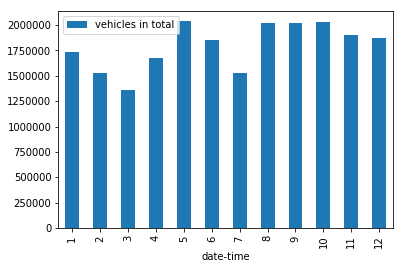

In [83]:
monthly.plot.bar()